## Introduction
 - This Dataset is about Goodreads Books.
 - This file contains the detailed information about the books, primarily. Detailed description for each column can be found alongside.

### Data Source

 - This data is available on kaggle

### Importing all the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

In [3]:
warnings.filterwarnings(action="ignore")

##### Set figure size and axes colour.

In [4]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = 11, 5
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.labelcolor'] = "#1520a6"
plt.rcParams['axes.labelsize'] = 15

### Reading the dataset and assigning it to a variable "book".

In [5]:
book = pd.read_csv('C:/Exercise/books.csv',error_bad_lines = False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [6]:
book.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [7]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


#### Checking for null values

In [8]:
book.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

#### 1. Which are the books with most occurances in the list?

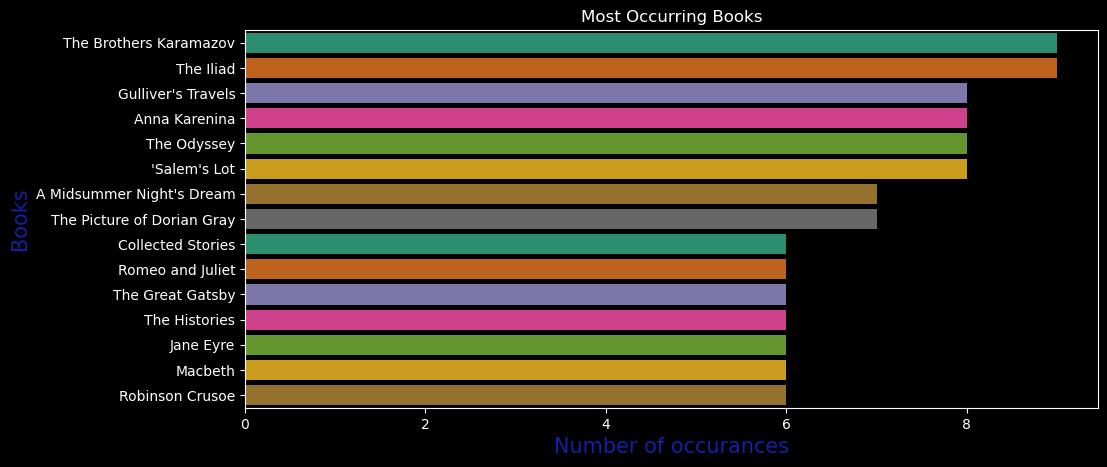

In [9]:
# starting 15 values
books = book['title'].value_counts()[:15]

sns.barplot(x = books,y=books.index, palette='Dark2')
plt.title("Most Occurring Books")
plt.xlabel("Number of occurances")
plt.ylabel("Books")
plt.show()

#### 2. What is the distribution of books for all languages?

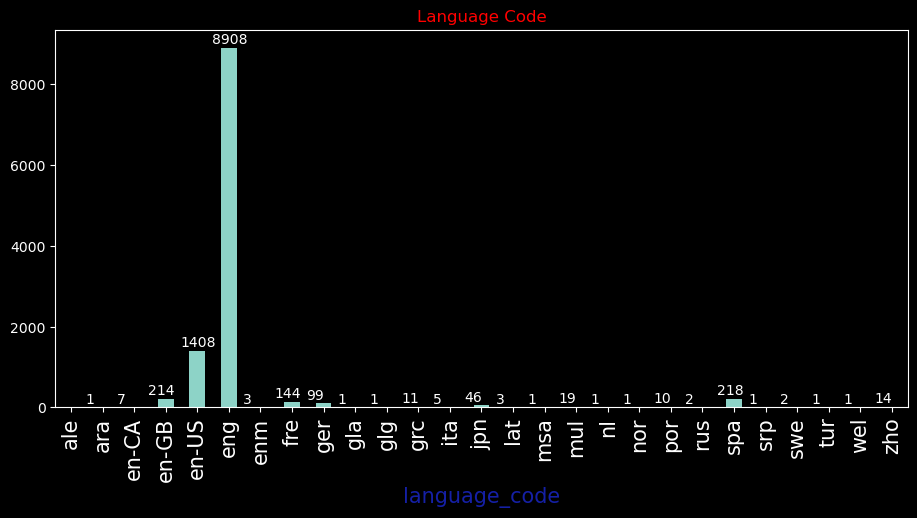

In [10]:
ax = book.groupby('language_code')['title'].count().plot.bar()
plt.title('Language Code',color='red')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))

#### 3. Count of User Ratings

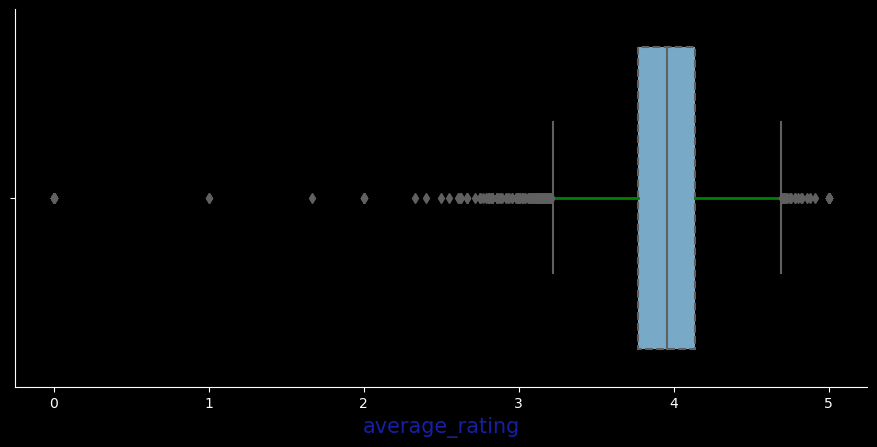

In [11]:
sns.boxplot(book['average_rating'], palette='Blues',whiskerprops={'color':'green','lw':2},
            boxprops={'ls':'--'})
sns.despine()
plt.show()

#### 4. Which are the top 10 most rated books?

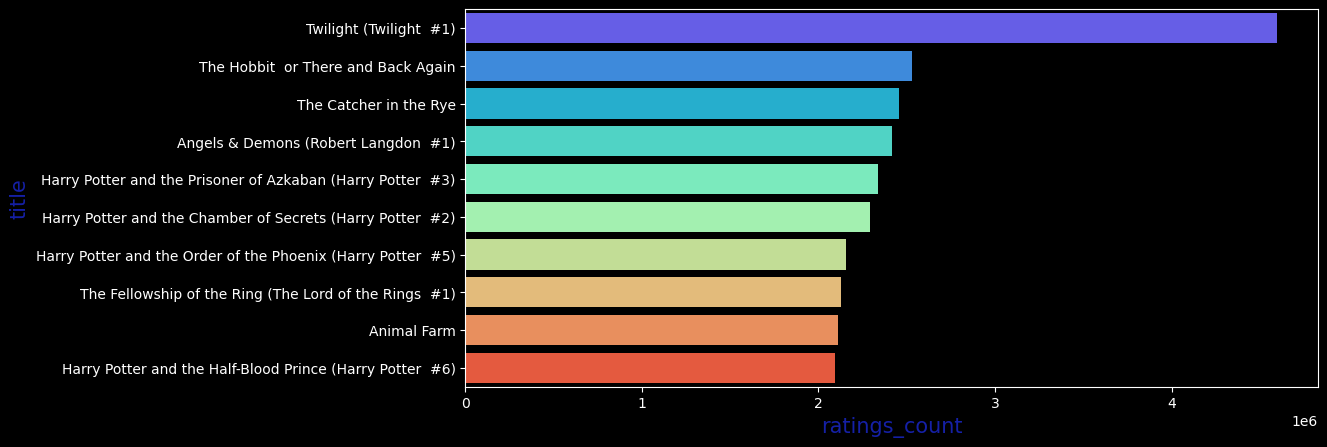

In [13]:
most_rated = book.sort_values('ratings_count', ascending = False).head(10).set_index('title')
sns.barplot(most_rated['ratings_count'], most_rated.index, palette='rainbow')
plt.show()

#### 5.  Rating distribution for the books?

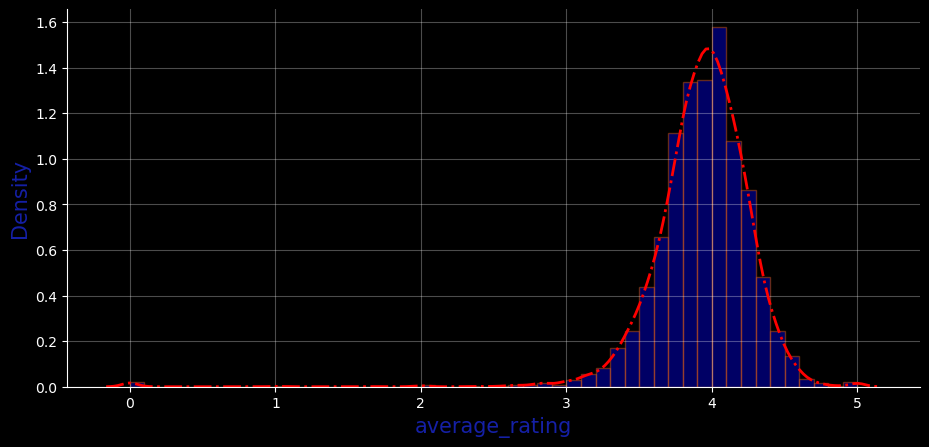

In [14]:
rating= book.average_rating
sns.distplot(rating, bins=50 ,hist_kws={'color':'blue', 'ec':'#ff6a00'}, kde_kws={'color':'red', 'ls':'-.', 'lw':2})
plt.grid(alpha=0.3)
sns.despine()
plt.show()

#### 6. Finding the top 15 authors with the most number of books

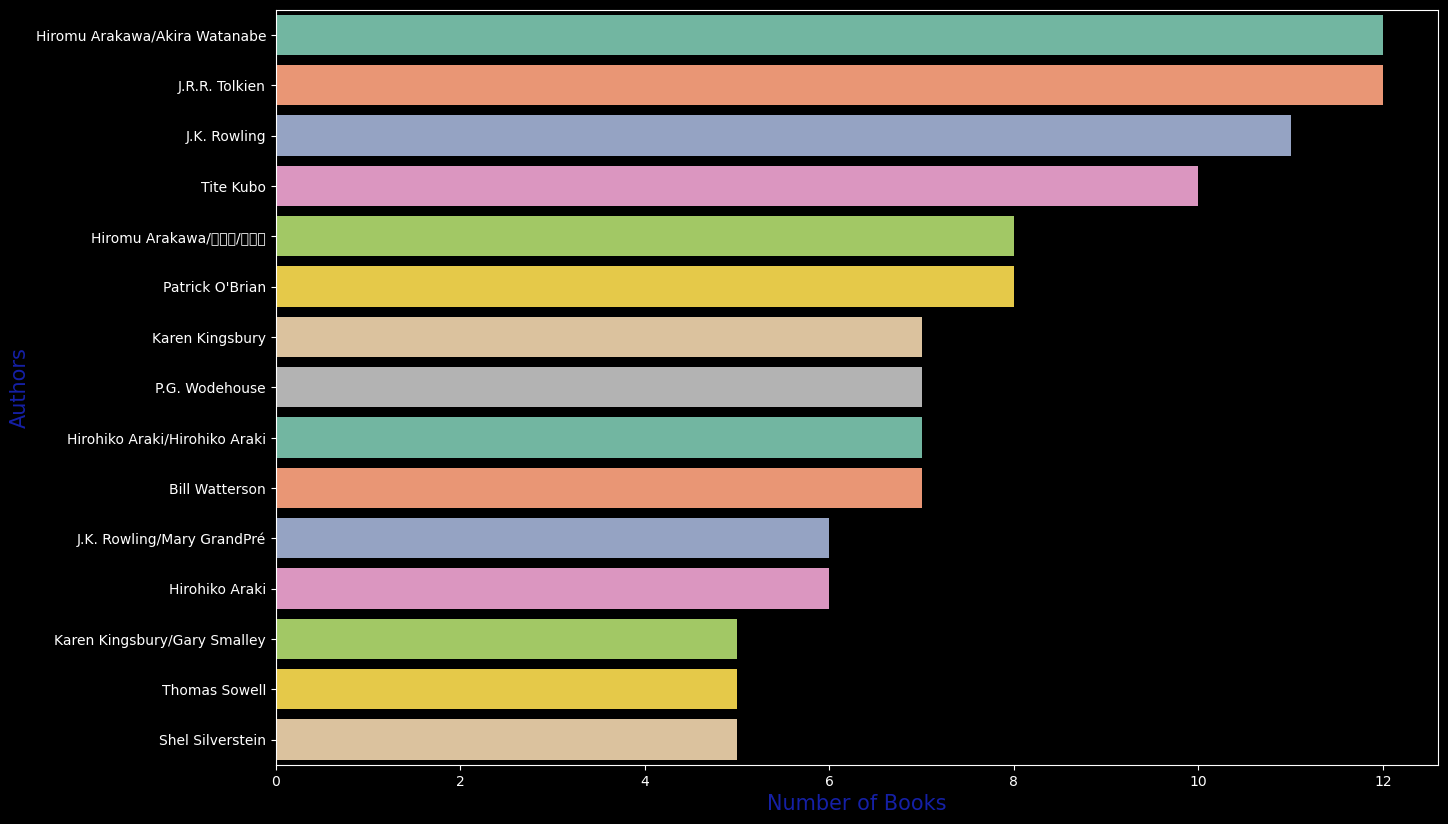

In [15]:
high_rated_author = book[book['average_rating']>=4.3]
high_rated_author = high_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(15).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(high_rated_author['title'], high_rated_author.index, palette='Set2')
ax.set_xlabel("Number of Books")
ax.set_ylabel("Authors")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')


#### 7. Ratio of Publisher

In [16]:
import numpy as np
def colors():
    return "#"+"".join(np.random.choice(list('abcdef123456789'), 6))

In [17]:
pub = book['publisher'].value_counts()[:10]

In [18]:
label = pub.index
val = pub.values

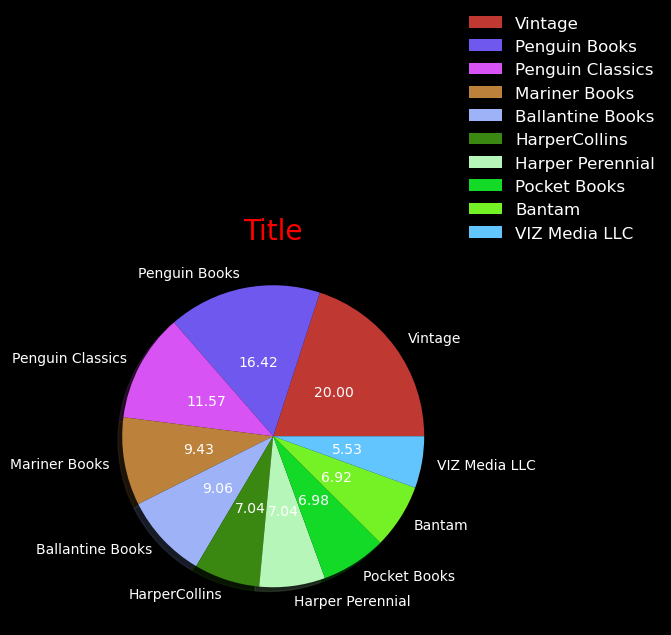

In [19]:
plt.pie(val, labels=label, autopct='%.2f',colors=[colors() for i in range(len(val))], pctdistance=0.5, shadow=True)
plt.title('Title', fontsize=20,color='red')
plt.legend(loc=[1,1], frameon=False, fontsize=12)
plt.show()

#### 8. Is there any relationship between ratings and review counts?

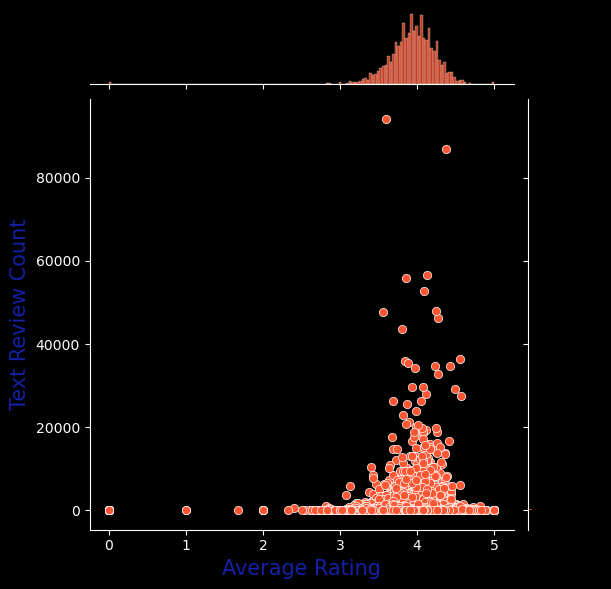

In [20]:
ax =sns.jointplot(x="average_rating",y='text_reviews_count', kind='scatter',color='#FF5733',data= book[['text_reviews_count', 'average_rating']])
ax.set_axis_labels("Average Rating", "Text Review Count")
plt.show()

#### 9. How many ratings and review counts are greater than 5000 ?

In [21]:
trial = book[(book['text_reviews_count']>5000)]

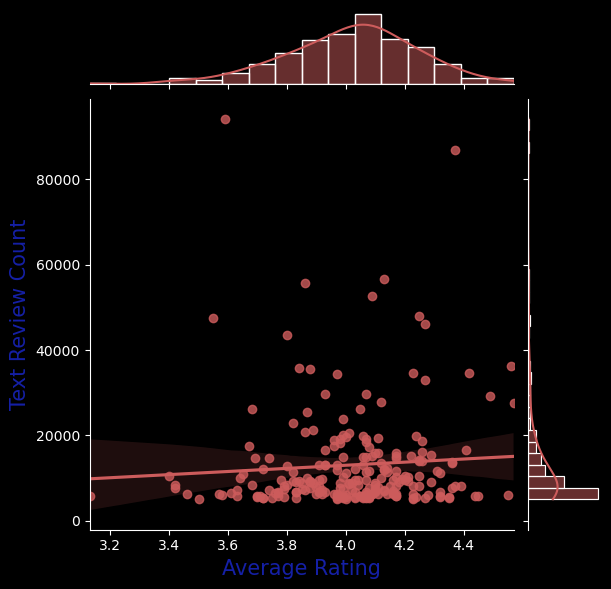

In [22]:
ax =sns.jointplot(x="average_rating",y='text_reviews_count', kind="reg" ,data= trial, color = '#CD5C5C')
ax.set_axis_labels("Average Rating", "Text Review Count")
plt.show()

## Thank You!!